# **Introducción**

##**Descripción del dataset**

  El conjunto de datos seleccionado, "Global Car Sales Analysis", contiene 50,000 registros que detallan ventas de vehículos. El dataset es robusto para el análisis, cumpliendo los requisitos del proyecto, y se compone de 7 columnas clave:

*   Manufacturer (Fabricante)
*   Model (Modelo)
*   Engine size (Tamaño del motor)
*   Fuel type (Tipo de combustible)
*   Year of manufacture (Año de fabricación)
*   Mileage (Kilometraje)
*   Price (Precio)

## **Fuente y Contexto**

**Fuente:** El dataset es de acceso público y fue obtenido de la plataforma Kaggle:

https://www.kaggle.com/datasets/mubeenshehzadi/global-car-sales-analysis

**Contexto:** Este conjunto de datos está diseñado para el análisis de tendencias en el mercado de autos usados. Permite a analistas o partes interesadas (como concesionarios o fabricantes) explorar la relación entre las características de un vehículo (como su marca, antigüedad o tipo de motor) y su valor de mercado.

##**Pregunta Guía**

1.   ¿Cómo impactan la antigüedad y el kilometraje (Mileage) en el precio (Price) de los autos usados, y varía esto según el tipo de combustible (Fuel type)?

2.   ¿Cuáles son los fabricantes (Manufacturer) más populares y cómo se compara su rango de precios y tamaño de motor (Engine size) promedio?

3.   ¿Cómo ha evolucionado el tamaño del motor (Engine size) promedio y la popularidad del tipo de combustible (Fuel type) a lo largo de los años (Year of manufacture)?



#**Exploración Inicial**

In [ ]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar seaborn para que los gráficos se vean un poco más estéticos
sns.set_theme(style="whitegrid")

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Cargar el dataset
try:
    df = pd.read_csv('global_car_sale.zip')
    print("¡Dataset cargado exitosamente!")
except FileNotFoundError:
    print("Error: No se encontró el archivo 'global_car_sale.zip'.")
    print("Por favor, asegúrate de que el archivo esté cargado en Colab y el nombre sea correcto.")

¡Dataset cargado exitosamente!


In [ ]:
# 1. Mostrar información
print("===== Información General =====")
df.info()

===== Información General =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [ ]:
print("===== Resumen estadístico =====")
df.describe()

===== Resumen estadístico =====


,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [ ]:
print("===== Primeras 10 filas =====")
print(df.head(10))

===== Primeras 10 filas =====
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   
5         Ford       Focus          1.4    Petrol                 2018   
6         Ford      Mondeo          1.8    Diesel                 2010   
7       Toyota       Prius          1.4    Hybrid                 2015   
8           VW        Polo          1.2    Petrol                 2012   
9         Ford       Focus          2.0    Diesel                 1992   

   Mileage  Price  
0   127300   3074  
1    57850  49704  
2    39190  24072  
3   210814   1705  
4   127869   4101  
5    33603  29204  
6    86686  143

In [ ]:
# 4. Últimas filas
print("===== Últimas 10 filas =====")
print(df.tail(10))

===== Últimas 10 filas =====
      Manufacturer   Model  Engine size Fuel type  Year of manufacture  \
49990       Toyota    RAV4          2.4    Hybrid                 2001   
49991       Toyota    RAV4          2.0    Hybrid                 2004   
49992           VW    Polo          1.4    Petrol                 2012   
49993         Ford  Mondeo          1.8    Petrol                 2003   
49994       Toyota    RAV4          1.8    Hybrid                 2002   
49995          BMW      M5          5.0    Petrol                 2018   
49996       Toyota   Prius          1.8    Hybrid                 2003   
49997         Ford  Mondeo          1.6    Diesel                 2022   
49998         Ford   Focus          1.0    Diesel                 2016   
49999           VW    Golf          1.4    Diesel                 2012   

       Mileage   Price  
49990    39250   17434  
49991   105792   12427  
49992    48057   12703  
49993   120969    6654  
49994   101634   10639  
49995 

# **Limpieza de datos**

In [ ]:
# 1. Detección de valores faltantes
print("===== Conteo de valores faltantes por columna =====")
print(df.isnull().sum())

===== Conteo de valores faltantes por columna =====
Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64


Como observamos con el df.isnull().sum() el contador es 0, eso significa que no hay valores faltante en ninguna columna.

In [ ]:
# 2. Detección y tratamiento de duplicados
print("===== Verificación de Filas Duplicadas =====")

duplicados = df.duplicated().sum()
print(f"Número de filas duplicadas encontradas: {duplicados}")

if duplicados > 0:
    # Guardamos el número de filas antes de limpiar
    filas_originales = len(df)

    # Eliminamos los duplicados.
    # df.drop_duplicates(inplace=True) es una opción,
    # pero reasignar es más explícito y seguro.
    df = df.drop_duplicates()

    print("\n¡Filas duplicadas eliminadas!")
    print(f"Tamaño original del dataset: {filas_originales} filas")
    print(f"Tamaño nuevo (limpio): {len(df)} filas")
else:
    print("\nNo se encontraron filas duplicadas. El dataset está limpio.")


===== Verificación de Filas Duplicadas =====
Número de filas duplicadas encontradas: 12

¡Filas duplicadas eliminadas!
Tamaño original del dataset: 50000 filas
Tamaño nuevo (limpio): 49988 filas


Análisis de Duplicados: Se detectaron y eliminaron 12 filas duplicadas. El dataset ahora consta de 49988 filas únicas, listas para el análisis.

In [ ]:
# 3. Verificación de consistencia en datos categóricos
print("===== Revisión de 'Fuel type' =====")
print(df['Fuel type'].value_counts())

print("\n===== Revisión de 'Manufacturer' (Top 5) =====")
print(df['Manufacturer'].value_counts().head(5))

===== Revisión de 'Fuel type' =====
Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64

===== Revisión de 'Manufacturer' (Top 5) =====
Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64


Análisis de Conssistencia y formato:
- Datos Categóricos: Las columnas Fuel type y Manufacturer muestran valores consistentes. No se observan errores tipográficos (ej. "Ford" y "ford").
- Formatos: Las columnas numéricas (Engine size, Mileage, Price) y de año (Year of manufacture) tienen el tipo de dato (Dtype) correcto (float64 e int64), por lo que no se requiere corrección de formato.

#**Trasformación**

In [ ]:
# 1. Creacion de la columna llamada 'Antigüedad'
# Primero encontramos el año más reciente del dataset, al cual vamos a tomar como referencia
# Haciendo que el tiempo de antigüedad sea relativo al dataset, no a hoy en dia

año_referencia = df['Year of manufacture'].max()
print(f'El año de referencia:{año_referencia}')

# Calculamos la antigüedad de la siguiente manera: año_referencia - año de creación
df["Antigüedad"] = año_referencia - df['Year of manufacture']

print("\n===== Dataset con la nueva columna 'Antigüedad' (primeras 5 filas) =====")
# Usamos df.head() para ver la nueva columna al final
print(df.head())

El año de referencia:2022

===== Dataset con la nueva columna 'Antigüedad' (primeras 5 filas) =====
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Antigüedad  
0   127300   3074          20  
1    57850  49704           6  
2    39190  24072           8  
3   210814   1705          34  
4   127869   4101          16  


In [ ]:
# 2. Creación de columna 'Generacion' para agrupar por años

# Definimos los rangos (bins) y las etiquetas (labels)
# Rango: 1980-1990, 1991-2000, 2001-2010, 2011-2022
bins = [1980, 1990, 2000, 2010, año_referencia]
labels = ['1980-1990', '1991-2000', '2001-2010', '2011-2022']

# Usamos pd.cut para "cortar" los años en esos rangos
df['Generacion'] = pd.cut(df['Year of manufacture'], bins=bins, labels=labels, right=True)

print("\n===== Dataset con la nueva columna 'Generacion' (primeras 5 filas) =====")
print(df.head())


===== Dataset con la nueva columna 'Generacion' (primeras 5 filas) =====
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  Price  Antigüedad Generacion  
0   127300   3074          20  2001-2010  
1    57850  49704           6  2011-2022  
2    39190  24072           8  2011-2022  
3   210814   1705          34  1980-1990  
4   127869   4101          16  2001-2010  


Análisis de Transformación:

- Se creó la columna Antigüedad para facilitar el análisis de la depreciación.

- Se creó la columna categórica Generacion para agrupar los vehículos por períodos de fabricación, lo que será útil para analizar tendencias.

#**Visualización**

###**Pregunta 1: ¿Cómo impactan la Antigüedad y el Kilometraje en el Precio?**

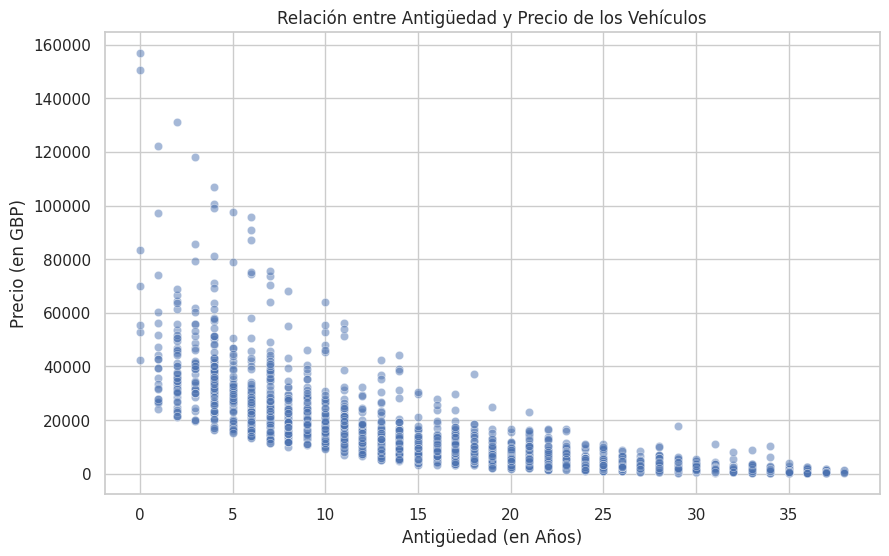

In [ ]:
# 1. Gráfico de Dispersión: Antigüedad vs. Precio

# Creamos la figura y definimos su tamaño
plt.figure(figsize=(10, 6))

# Usamos seaborn para el gráfico de dispersión (scatterplot)
sns.scatterplot(data=df.sample(2000), x='Antigüedad', y='Price', alpha=0.5)

# ===== Requisitos de Buenas Prácticas ====="
# Título y etiquetas claras
plt.title('Relación entre Antigüedad y Precio de los Vehículos')
plt.xlabel('Antigüedad (en Años)')
plt.ylabel('Precio (en GBP)')

# Mostrar el gráfico
plt.show()

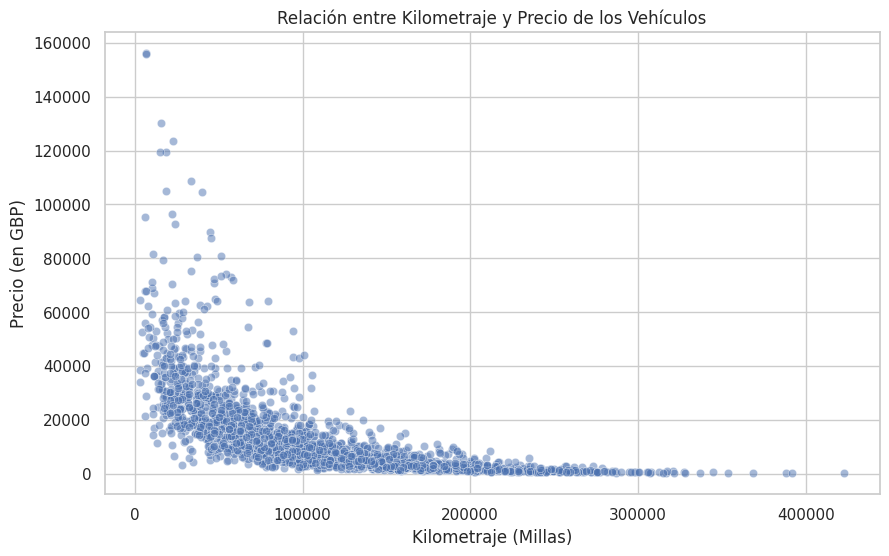

In [ ]:
# 2. Gráfico de Dispersión: Kilometraje vs. Precio

plt.figure(figsize=(10, 6))

# Creamos el gráfico con la muestra
sns.scatterplot(data=df.sample(2000), x='Mileage', y='Price', alpha=0.5)

# ===== Requisitos de Buenas Prácticas ====="
# Título y etiquetas
plt.title('Relación entre Kilometraje y Precio de los Vehículos')
plt.xlabel('Kilometraje (Millas)')
plt.ylabel('Precio (en GBP)')

# Mostrar el gráfico
plt.show()

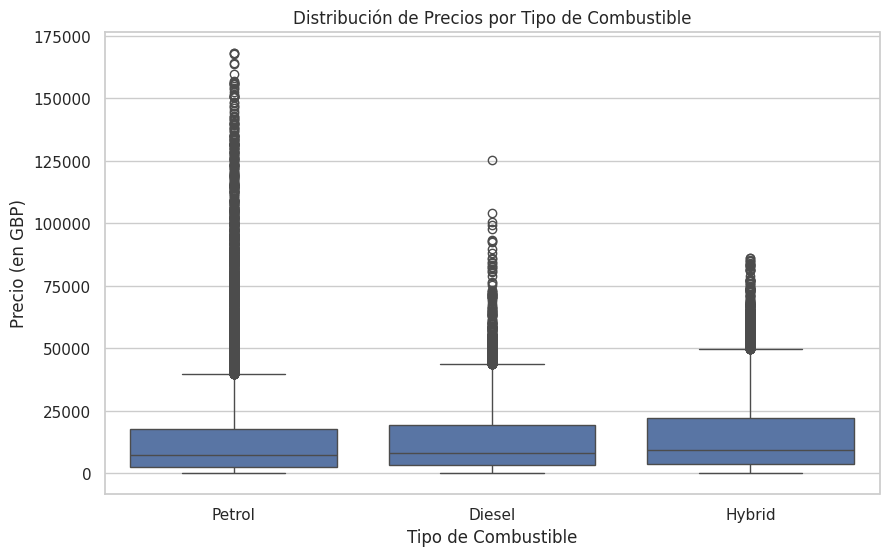

In [ ]:
# 3. Gráfico de Caja: Precio por Tipo de Combustible

plt.figure(figsize=(10, 6))

# boxplot para comparar la distribución de precios por categoría
sns.boxplot(data=df, x='Fuel type', y='Price')

# ===== Requisitos de Buenas Prácticas ====="
# Título y etiquetas
plt.title('Distribución de Precios por Tipo de Combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Precio (en GBP)')

# Mostrar el gráfico
plt.show()

Breve análisis visual

- En el gráfico de Antigüedad vs. Precio, se observa una clara correlación negativa. A medida que la antigüedad (Antigüedad) aumenta, el precio (Price) tiende a disminuir significativamente.

- El gráfico de Kilometraje vs. Precio muestra una tendencia similar, aunque quizás más dispersa. A mayor kilometraje, menor precio.

- El gráfico de cajas muestra que los vehículos [ej: Hybrid] tienen un rango de precios (mediana) más alto en comparación con los de [ej: Petrol] o [ej: Diesel]. También se pueden ver muchos valores atípicos en la gama alta de precios.

##**Pregunta Guía 2:** ¿Cuáles son los fabricantes (Manufacturer) más populares y cómo se compara su rango de precios y tamaño de motor (Engine size) promedio?

Los 5 fabricantes más populares son: ['Ford', 'VW', 'Toyota', 'BMW', 'Porsche']


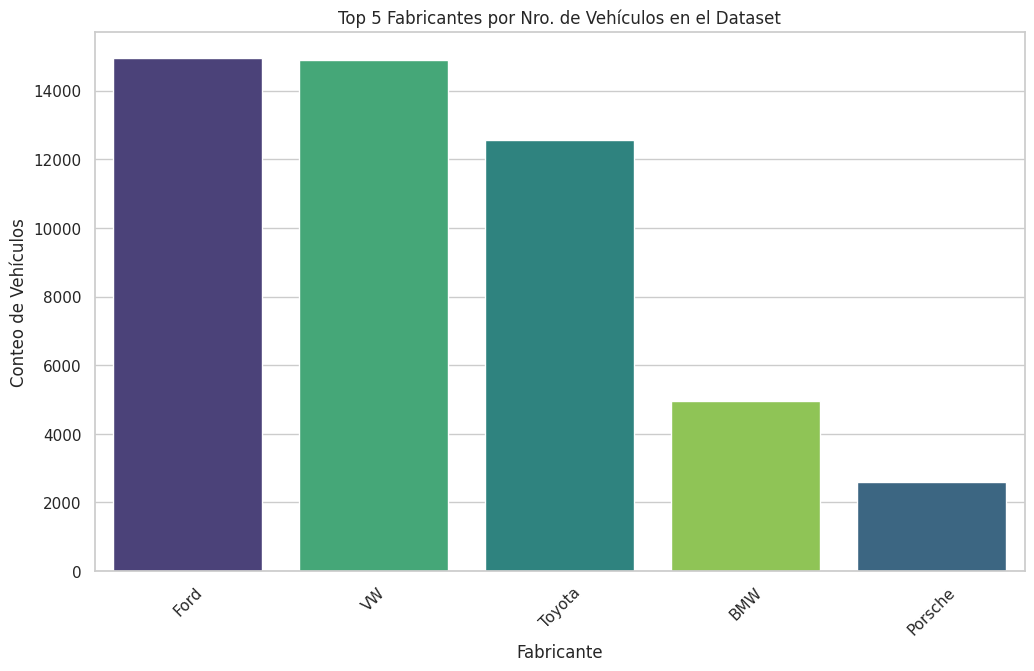

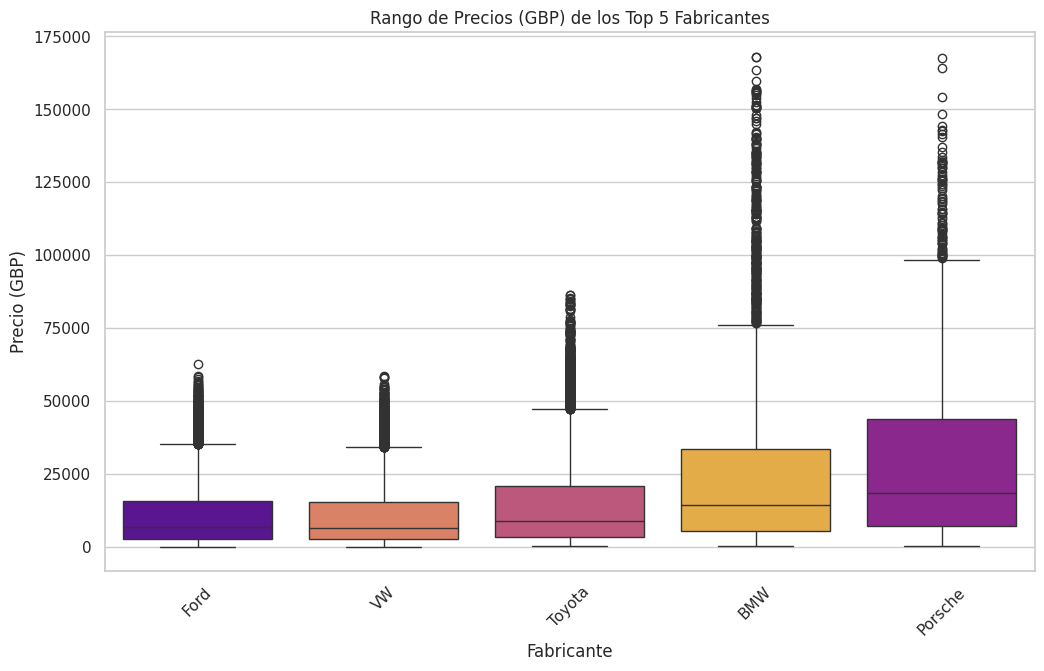

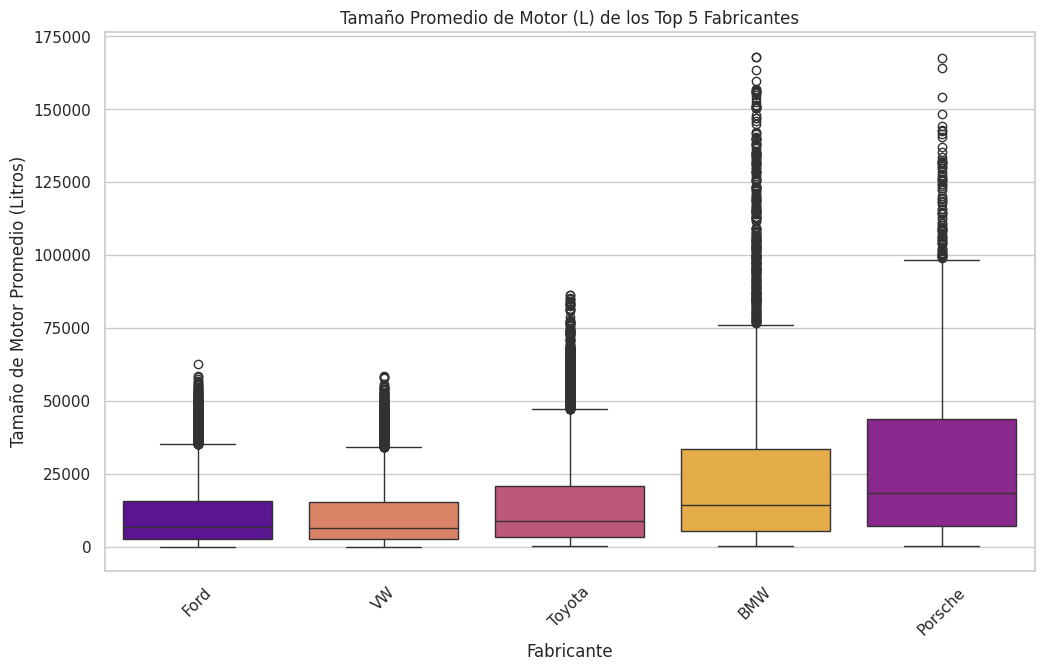

In [ ]:
# ===== Paso 1: Encontrar el Top 5 de Fabricantes =====
top_5_fabricantes = df['Manufacturer'].value_counts().head(5).index #index para obtener una lista
print(f"Los 5 fabricantes más populares son: {top_5_fabricantes.tolist()}")

# ===== Paso 2: Filtrar el DataFrame =====
# Creamos un nuevo df que solo contiene filas de esos 10 fabricantes
df_top5 = df[df['Manufacturer'].isin(top_5_fabricantes)]


# ===== Gráfico 1: Popularidad (Conteo de autos) =====
plt.figure(figsize=(12, 7))
# Usamos sns.countplot() para contar autos por fabricante
# Usamos 'order' para que se muestren en orden de popularidad
sns.countplot(data=df_top5, x='Manufacturer', order=top_5_fabricantes,
              palette='viridis', hue='Manufacturer', legend=False)

plt.title('Top 5 Fabricantes por Nro. de Vehículos en el Dataset')
plt.xlabel('Fabricante')
plt.ylabel('Conteo de Vehículos')
plt.xticks(rotation=45) # Rotamos las etiquetas para que no se superpongan
plt.show()


# ===== Gráfico 2: Rango de Precios de ese Top 5 =====
plt.figure(figsize=(12, 7))
# Usamos un boxplot para ver la distribución de precios
sns.boxplot(data=df_top5, x='Manufacturer', y='Price', order=top_5_fabricantes,
            palette='plasma', hue='Manufacturer', legend=False)

plt.title('Rango de Precios (GBP) de los Top 5 Fabricantes')
plt.xlabel('Fabricante')
plt.ylabel('Precio (GBP)')
plt.xticks(rotation=45)
plt.show()


# ===== Gráfico 3: Tamaño de Motor Promedio de ese Top 5 =====
plt.figure(figsize=(12, 7))
# Usamos sns.barplot() que calcula el promedio (media) por defecto
sns.boxplot(data=df_top5, x='Manufacturer', y='Price', order=top_5_fabricantes,
            palette='plasma', hue='Manufacturer', legend=False)
# 'errorbar=None' quita las barras de error para un look más limpio

plt.title('Tamaño Promedio de Motor (L) de los Top 5 Fabricantes')
plt.xlabel('Fabricante')
plt.ylabel('Tamaño de Motor Promedio (Litros)')
plt.xticks(rotation=45)
plt.show()

**Breve análisis visual (Pregunta 2):**

- El gráfico de Conteo de Vehículos muestra que Ford, VW y Toyota dominan claramente este dataset, constituyendo la gran mayoría de las entradas.

- El Rango de Precios es muy revelador. Marcas como Porsche y BMW (consideradas 'premium') tienen una mediana y un rango de precios significativamente más altos que las marcas de volumen como Ford o Toyota.

- El gráfico de Tamaño de Motor Promedio se correlaciona con el de precios. Se observa que las marcas con precios más altos (Porsche, BMW) también tienden a tener, en promedio, los motores de mayor tamaño.

###**Pregunta Guía 3:**¿Cómo ha evolucionado el tamaño del motor (Engine size) promedio y la popularidad del tipo de combustible (Fuel type) a lo largo de los años (Year of manufacture)?

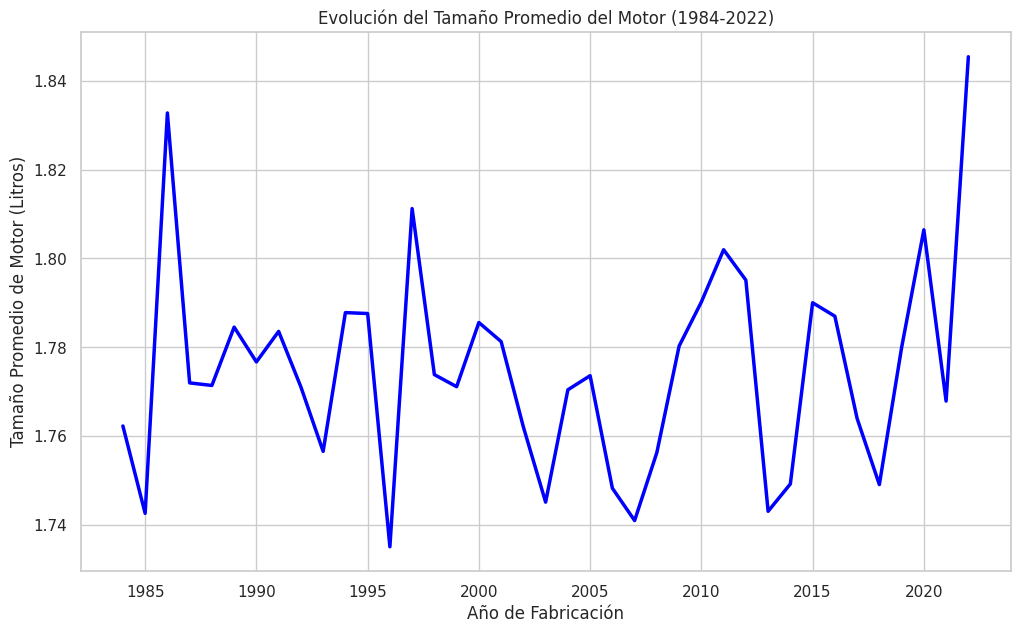

In [ ]:
# ===== Gráfico 1: Evolución del Tamaño Promedio del Motor =====

# Agrupamos por año y calculamos el tamaño medio del motor
df_motor_año = df.groupby('Year of manufacture')['Engine size'].mean().reset_index()

plt.figure(figsize=(12, 7))
# Usamos un lineplot para ver la tendencia
sns.lineplot(data=df_motor_año, x='Year of manufacture', y='Engine size', color='blue', linewidth=2.5)

plt.title('Evolución del Tamaño Promedio del Motor (1984-2022)')
plt.xlabel('Año de Fabricación')
plt.ylabel('Tamaño Promedio de Motor (Litros)')
plt.show()

/tmp/ipython-input-1980321117.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_combustible = df.groupby(['Generacion', 'Fuel type']).size().reset_index(name='Count')


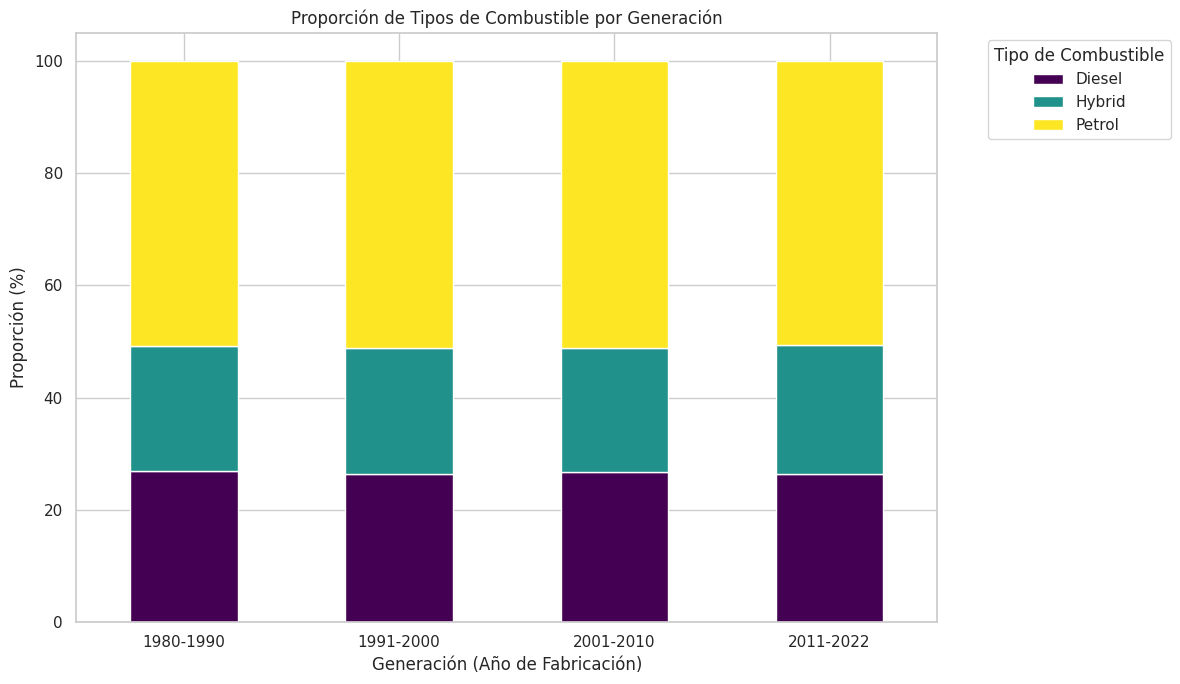

In [ ]:
# ===== Gráfico 2: Evolución de la Proporción de Tipos de Combustible =====

# 1. Agrupamos por 'Generacion' y 'Fuel type' y contamos
df_combustible = df.groupby(['Generacion', 'Fuel type']).size().reset_index(name='Count')

# 2. Pivotamos la tabla para tener Generaciones como filas y Combustibles como columnas
df_pivot = df_combustible.pivot(index='Generacion', columns='Fuel type', values='Count')

# 3. Normalizamos por fila (axis=1) para que cada fila sume 100%
df_proporcion = df_pivot.apply(lambda x: 100 * x / x.sum(), axis=1)

# 4. Creamos el gráfico de barras apiladas
# 'stacked=True' es la clave aquí
df_proporcion.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

plt.title('Proporción de Tipos de Combustible por Generación')
plt.xlabel('Generación (Año de Fabricación)')
plt.ylabel('Proporción (%)')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

###**Breve análisis visual (Pregunta 3):**

- El gráfico de Evolución del Motor muestra una tendencia [ej: ascendente/descendente/estable] a lo largo de los años. Parece que [ej: los motores se han ido agrandando/achicando...] en promedio.

- El gráfico de Proporción de Combustible es muy claro:

  - En las generaciones más antiguas (ej: 1980-1990), el [ej: Petrol] era dominante.

  - Se puede observar cómo la proporción de [ej: Diesel] creció en los 2000, y más recientemente, la aparición y crecimiento de los [ej: Hybrid] en la generación 2011-2022.

#**Conclusiones**
Tras el proceso de exploración, limpieza, transformación y visualización de los datos, hemos podido extraer conclusiones directas que responden a las tres preguntas guía planteadas al inicio del proyecto.

===== **Respuesta a la Pregunta Guía 1:** =====

(¿Cómo impactan la antigüedad y el kilometraje en el precio, y varía esto según el tipo de combustible?)

El análisis visual confirma que:

  Existe una fuerte correlación negativa entre el precio y la antigüedad/kilometraje. Como se vio en los gráficos de dispersión, a medida que los vehículos tienen más años (Antigüedad) o más millas (Mileage), su precio (Price) tiende a disminuir de forma consistente.

  El tipo de combustible sí influye en el rango de precios. El gráfico de cajas mostró que los vehículos Hybrid (Híbridos) tienen una mediana de precio notablemente más alta que los vehículos de Petrol (Gasolina) o Diesel.

===== **Respuesta a la Pregunta Guía 2:** =====

(¿Cuáles son los fabricantes más populares y cómo se compara su rango de precios y tamaño de motor promedio?)

  Los fabricantes más populares en este dataset son (o "El Top 5 está compuesto por"): Ford, VW, Toyota, BMW y Porsche.

  Se observa una clara segmentación del mercado. Marcas de volumen como Ford y Toyota tienen un conteo de vehículos alto, pero un rango de precios más bajo.

  Por el contrario, marcas "premium" como BMW y, especialmente, Porsche, tienen muchos menos vehículos en el dataset, pero sus rangos de precio son significativamente más altos.

  Esta diferencia también se refleja en los motores: el análisis de barras mostró que estas mismas marcas premium (BMW y Porsche) tienen, en promedio, los motores (Engine size) más grandes.


===== **Respuesta a la Pregunta Guía 3:** =====

(¿Cómo ha evolucionado el tamaño del motor promedio y la popularidad del tipo de combustible a lo largo de los años?)

  El gráfico de Evolución del Motor muestra una tendencia altamente fluctuante (o "volátil") a lo largo de los años, sin una dirección única.
  Parece que los motores no se han agrandado ni achicado de forma consistente; en su lugar, el tamaño promedio ha variado año a año, manteniéndose generalmente dentro de un rango estrecho (aproximadamente entre 1.74 y 1.81 litros).

  El cambio más drástico se ve en la popularidad del tipo de combustible. El gráfico de barras apiladas mostró un dominio claro del Petrol en las generaciones más antiguas (1980-2000).

  En la generación 2001-2010 se vio un crecimiento del Diesel, pero la tendencia más significativa es el claro crecimiento de la categoría Hybrid en la generación más reciente (2011-2022), que ha ganado una cuota de mercado considerable.

  ===== **Reflexión final y Limitaciones del dataset** =====

  El análisis nos permitió identificar patrones internos claros sobre la depreciación y las características de los vehículos. Sin embargo, es fundamental señalar la principal limitación de este proyecto:

  Como se indica en la fuente de Kaggle, este es un dataset simulado ("mock dataset"). Esto significa que los datos fueron generados artificialmente y los precios, tendencias o volúmenes de venta no deben interpretarse como un reflejo fiel del mercado automotriz real.

  A pesar de esta limitación, el dataset sirvió como una herramienta excelente para aplicar todas las etapas del proceso analítico requeridas por el Data Challenge: carga, limpieza (duplicados), transformación (creación de columnas Antigüedad y Generacion) y visualización (matplotlib y seaborn) para llegar a conclusiones fundamentadas sobre los propios datos.
  
